# Lab 1 Inroduction



This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

Let's import all the necessary packages:

In [2]:
# %matplotlib inline is a magic function for displaying the image in the notebook
%matplotlib inline
import numpy as np
import cv2
import copy
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from IPython.display import display, Image


## Task 1. Basic loading and displaying

This is an unassessed task to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Introduction to Python Workshop](https://monashdatafluency.github.io/python-workshop-base/) github tutorial which provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint 1: images in python can be though of as a multidimentional array`
`Hint 2: Use OpenCV to load the image`

In [8]:
# fill in missing part
img = cv2.imread('../dataset/Lenna.png') # replace this code and load your image

print(img.shape)
# display the image (Hint: use plt.imshow)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img.shape)
cv2.imshow("Image", img) 
cv2.waitKey(1) #plt.imshow(img)

(512, 512, 3)
(512, 512)


-1

Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

(512, 512, 3)


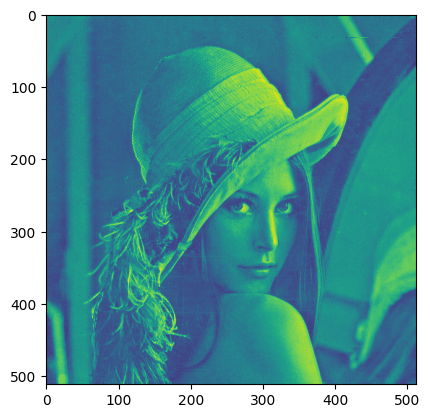

In [3]:
print(img.shape)

b,g,r = cv2.split(img)

plt.imshow(b)
# Play with the images here 

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

(512, 512, 3)


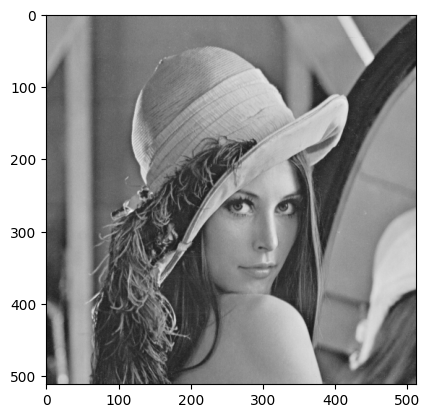

In [4]:
img = cv2.imread('../dataset/Lenna.png') # replace this code and load your image
print(img.shape)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)

# display the image (Hint: use plt.imshow)
plt.imshow(rgb, cmap="gray", vmin=0, vmax=255)


Try writing your oen method to convert RGB images to gray scale.

In [5]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    print(f"Height {h}, Width: {w}")
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

Height 500, Width: 333


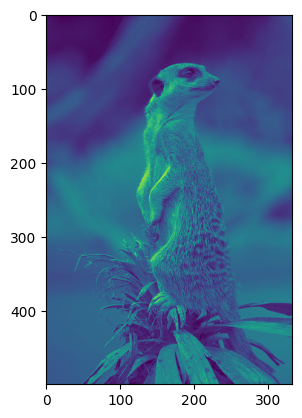

In [6]:
meerkat = cv2.imread('../dataset/meerkat.jpg') # replace this code and load your image

plt.imshow(to_gray(meerkat))

##  Task 2. Basic loading and displayingMore advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

In [8]:
transposed_img = cv2.imread("../dataset/Lenna.png") # replace this code and load your image
transposed_img = cv2.transpose(transposed_img)
cv2.imshow("Image", transposed_img) 
cv2.waitKey(1) 
#plt.imshow(to_gray(transposed_img))
# display the transposed_img (Hint: use plt.imshow)

-1

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

`Hint: Do not use for loop, try NumPy array slicing. Be carefull of the coordinate system!`

In [9]:
img = cv2.imread('../dataset/Lenna.png') # replace this code and load your image
h,w,c = img.shape
print(f"height: {h}, width: {w}")

first_part = img[0:256, 0:256]
second_part = img[0:256, 256:]
third_part = img[256:, 0:256]
fourth_part = img[256:, 256:]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Display each image in a subplot
axes[0, 0].imshow(first_part)
axes[0, 0].set_title('Image 1')

axes[0, 1].imshow(second_part)
axes[0, 1].set_title('Image 2')

axes[1, 0].imshow(third_part)
axes[1, 0].set_title('Image 3')

axes[1, 1].imshow(fourth_part)
axes[1, 1].set_title('Image 4')

# Remove axes for clarity
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()



height: 512, width: 512


KeyboardInterrupt: 

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

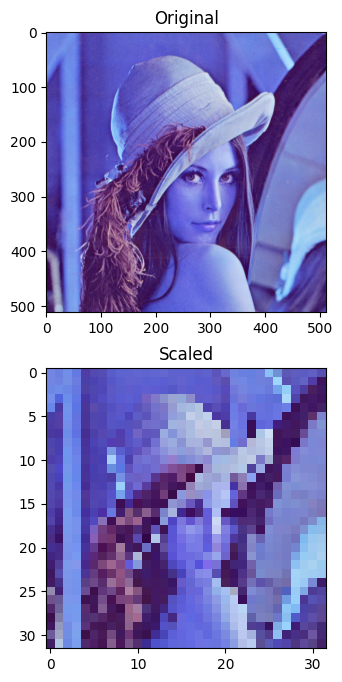

In [10]:
img = cv2.imread('../dataset/Lenna.png') # replace this code and load your image
h,w,c = (img.shape)
scaled_img = cv2.resize(img, (32, 32), interpolation = cv2.INTER_LINEAR) # replace this part

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Display each image in a subplot
axes[0].imshow(img)
axes[0].set_title('Original')

axes[1].imshow(scaled_img)
axes[1].set_title('Scaled')


# Remove axes for clarity


plt.show()




In [11]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    scaled_img = img # Modify this part to convert the image onto gray scale

    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.

##  Task 3: Image Histograms


In [12]:
import numpy as np
import copy
import cv2
import matplotlib
from matplotlib import pyplot as plt
import random
import copy
from PIL import Image
#to visualize the plots within the notebook
%matplotlib inline
# for making plots looking nicer
plt.style.use('fivethirtyeight')

### 3.1: Compute Histogram
Histograms can be rather important when it comes to adjusting the brightness of an image.
Your first task is to compute a histogram of an image of your choice and display this as a plot.

*Note: Do not use any libraries, write your own function*

In [ ]:
def compute_hist(img):
    '''
    Impelemnt 
    :param img: gray scaled image with size HxW
    :return histogram array: 
    '''
    '''
    hint: use np.count_nonzero
    '''
    return(np.histogram(img))
    pass
        
 

(512, 512)
262144


ValueError: x, y, and format string must not be None

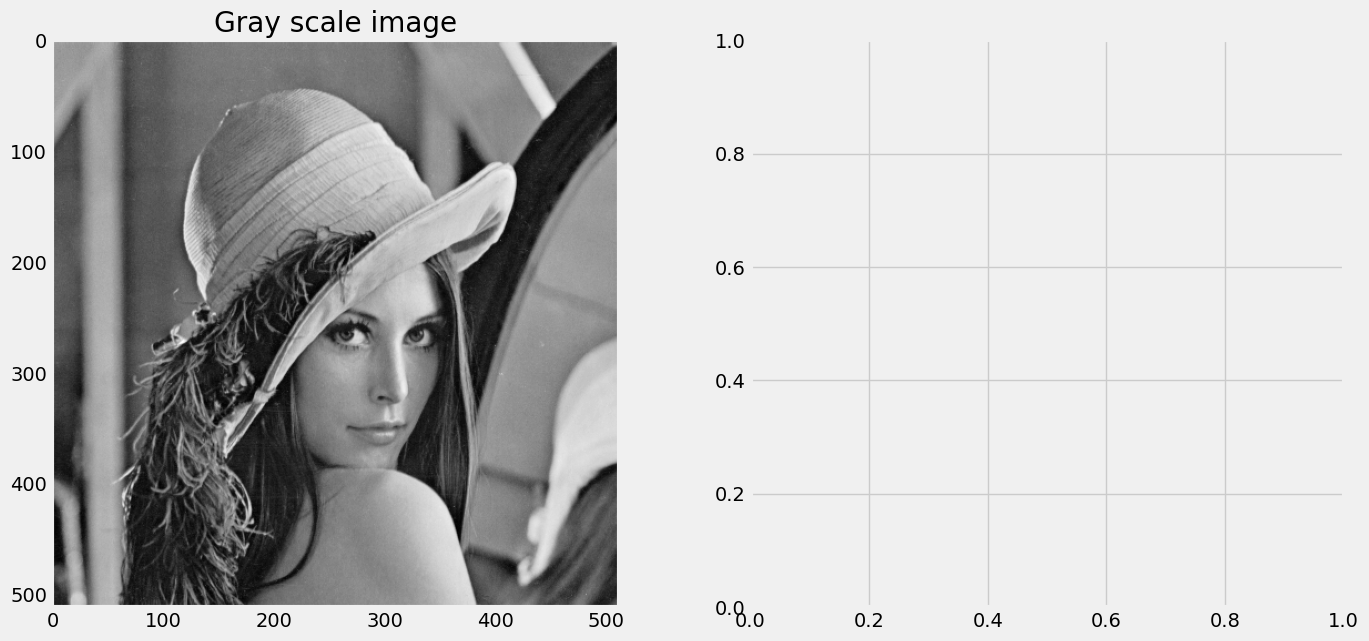

In [32]:
img = cv2.imread('../dataset/Lenna.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(gray_img.shape)
img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

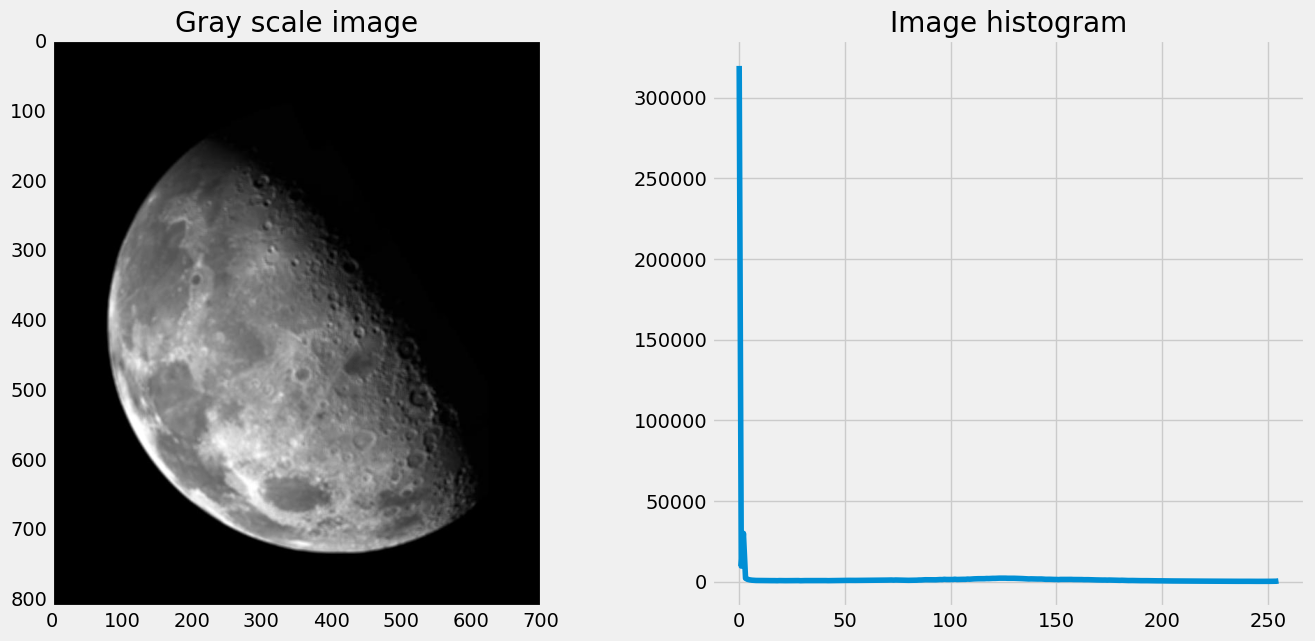

In [33]:
img = cv2.imread('../dataset/Moon.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = compute_hist(gray_img)

# Show Original and segmented image
fig, axis = plt.subplots(1, 2, figsize=(15,7), sharey=False)
#fig.subplots_adjust(wspace=-0.2, hspace=0.0)
axis[0].imshow(gray_img, 'gray')
axis[0].grid(False)
axis[0].set_title('Gray scale image')

axis[1].plot(img_hist)
axis[1].set_title('Image histogram')

plt.show()

Why is there such a differece between Lenna and Moon on the histogram?

## Task 4: Histogram Equalisation
Histogram Equalisation is often used to adjust the global contrast of an image.
It is most useful when an image’s background is either too dark or too light and can bring out more detail in under exposed images.

This can be done by finding a mapping function $F: [0, 255] \rightarrow [0, 255]$:

$$
    F(v) = \frac{cdf(v) - cdf_{min}}{(M \times N) - cdf_{min}}\times(L - 1)
$$

Where $v$ is the current value to be adjusted, $(M \times N)$ is the size of the image and $L$ is the number of intensity levels i.e. 256. The cdf is the cumulative distribution of the histogram.

**Hint: this is essentially equivalent to do histgram mathcing with a source CDF as straight line.**

Your task would be to calculate the new mappings, apply this to the image and plot the new equalised histogram. As shown below:

In [15]:
def hist_equalisation(img, img_hist):
    '''
    Impelemnt 
    :param img: gray scaled image with size HxW
    :param img_hist: [256,]
    :param L:
    :return: image segmentation of size HxW
    '''

    '''
    hint: use np.cumsum
    '''
    pass

In [22]:
img_cdf = np.cumsum(img_hist)
h, w = gray_img.shape
uni_hist = np.ones(256,) * h * w / 256
uni_cdf = np.cumsum(uni_hist)
eqImg = hist_equalisation(gray_img, img_hist)
eqImg_hist = compute_hist(eqImg.astype(int))
eqImg_cdf = np.cumsum(eqImg_hist)

# Plot Original and Equalised image
plt.figure(figsize=(15,10))

plt.subplot(1,2, 1)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(eqImg, 'gray')
plt.grid(False)
plt.title('Equalized Image')

plt.subplot(2, 1, 1)
plt.plot(eqImg_hist, color='red', label='equalised_hist')
plt.plot(img_hist, label='original_hist')
plt.plot(uni_hist, color="green", label='perfect uniform hist')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(eqImg_cdf, color="red", label="equalised_cdf")
plt.plot(img_cdf, label="original_cdf")
plt.plot(uni_cdf, color="green", label='perfect uniform cdf')
plt.legend()

plt.show()

AttributeError: 'NoneType' object has no attribute 'astype'

## Task 5: Histogram Matching

Your next task is to be able to adjust an image based on the histogram of another.
This is done using histogram matching and can be helpful if you would like to adjust a series of images with different global illuminations. Using histogram matching you could adjust this image’s brightness (and contrast) to match the other better illuminated images.

To perform histogram matching we need to first calculate the normalised CDF of the **source image** and the **target image**: `cdfSource` and `cdfTarget`.

The normalised CDF for each image is obtained by dividing the value in each bin of the original CDF with the maximum value of the original CDF (last bin of the original CDF), so we get a value between 0 and 1 in each bin of the normalised CDF.

We then need to find a mapping function `F` that maps `cdfSource` to `cdfTarget`. This mapping function can then be applied to the input image. The mapping function needed is quite simple and can be obtained by comparing the values between cdfSource and cdfTarget. One way to do this, is to find the first `cdfSource(valueS)` that is greater than `cdfTarget(valueT)`, and that valueT will be the mapping `F(valueS)`. The figure below is a demonstration on how this mapping function works:

<img src="../images/histogram-cdf.png" alt="drawing" width="700"/>

In [ ]:
def hist_match(source_img, target_img):
    '''
    Impelemnt 
    :param source_img: gray scaled image with size HxW
    :param target_img: 
    :return: image 
    '''
    '''
    Impelemnt 
    :param source_img: gray scaled image with size HxW
    :param target_img: 
    :return: image 
    '''
    pass

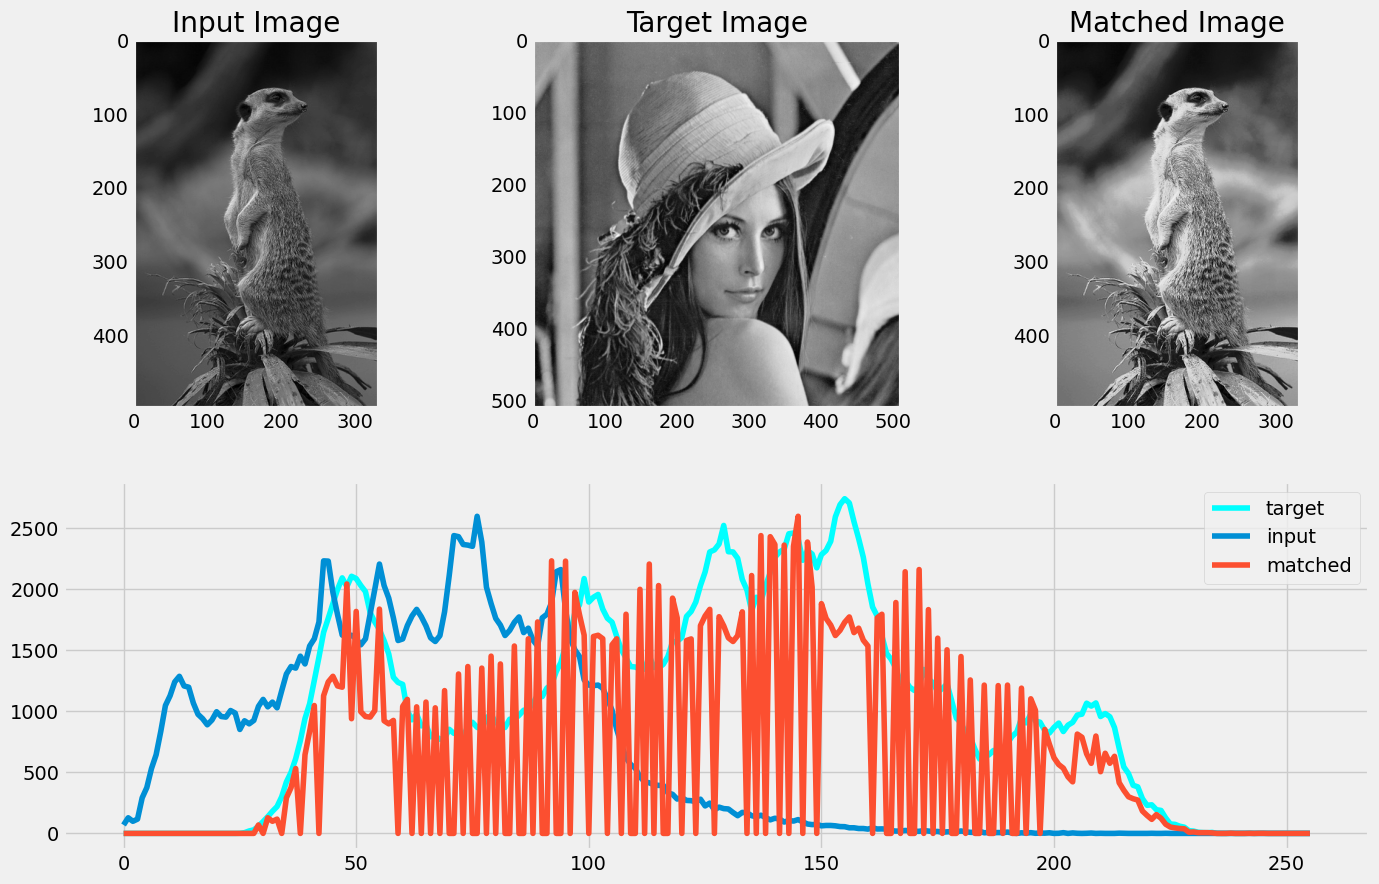

In [30]:
src_img = cv2.imread('../dataset/meerkat.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = gray_img
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()

# Task 6 Try with your webcam!
Capture some real image with your laptop webcam or other usb cameras and match their historgrams.
Try capture images under different ligthing conditions.

In [37]:
import uuid
import os

Webcam 0 opened. Press 'q' in the preview window to capture and save the image.
Image saved to captured_dataset\a58e5c3a.jpg


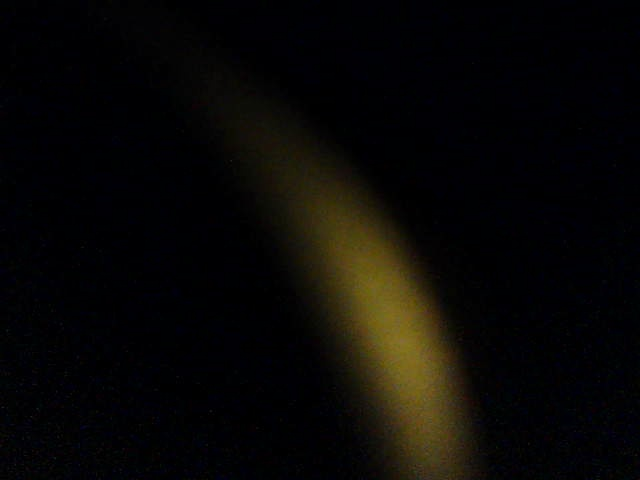

In [39]:
from IPython.display import display, Image


# Function to capture and preview an image from a webcam
def capture_webcam_image(cam_index=0, save_folder="captured_dataset"):
    # Ensure the save folder exists
    os.makedirs(save_folder, exist_ok=True)
    
    # Generate a short UUID for the filename
    short_uuid = str(uuid.uuid4())[:8]
    save_path = os.path.join(save_folder, f"{short_uuid}.jpg")
    
    # Open the webcam with the specified index
    cap = cv2.VideoCapture(cam_index)
    
    if not cap.isOpened():
        print(f"Cannot open webcam with index {cam_index}")
        return
    
    print(f"Webcam {cam_index} opened. Press 'q' in the preview window to capture and save the image.")
    
    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image.")
            break
        
        # Display the frame in a preview window
        cv2.imshow("Webcam Preview", frame)
        
        # Wait for the user to press 'q' to capture
        if cv2.waitKey(1) & 0xFF == ord('q'):
            # Save the captured image
            cv2.imwrite(save_path, frame)
            print(f"Image saved to {save_path}")
            break

    # Release the webcam and close the window
    cap.release()
    cv2.destroyAllWindows()



    
    # Display the saved image in the Jupyter Notebook
    with open(save_path, "rb") as file:
        display(Image(data=file.read()))

        
    return short_uuid, save_path
# Call the function to preview and capture an image
short_uuid, save_path = capture_webcam_image(cam_index=0, save_folder="captured_dataset")


In [ ]:
if short_uuid:
    src_img = cv2.imread(save_path)
    if src_img is not None:
        print(f"Image successfully read from {save_path}")
    else:
        print("Failed to read the saved image.")


# src_img = cv2.imread('./captured_dataset/9c69ba35.jpg')
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
tgt_img = gray_img
tgt_hist = img_hist

matched_img, src_hist, tgt_hist = hist_match(src_img, tgt_img)
matched_hist = compute_hist(matched_img.astype(int))


# Plot Input, Output and Matched image
plt.figure(figsize=(15,10))

plt.subplot(231)
plt.imshow(src_img, 'gray')
plt.grid(False)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(gray_img, 'gray')
plt.grid(False)
plt.title('Target Image')

plt.subplot(233)
plt.imshow(matched_img, 'gray')
plt.grid(False)
plt.title('Matched Image')

plt.subplot(212)
plt.plot(tgt_hist, color='cyan', label='target')
plt.plot(src_hist, label='input')
plt.plot(matched_hist, label='matched')
plt.legend()

plt.show()